In [1]:
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
import seaborn as sns

In [2]:
df = pd.read_csv('PubChem__dota_cpds.csv')

In [3]:
df.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,121841,Tetraxetan,"DOTA|Tetraxetan|60239-18-1|1,4,7,10-Tetraazacy...",404.42,C16H28N4O8,162.0,447.0,-10.6,28,4,...,38696,8663,NaN,Biological Test Results|Chemical and Physical ...,12,1|3|5|7|9|13|15|19|21|23|25|31|33|35|37|41|43|...,20050326,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,D064449 - Sequestering Agents > D002614 - Chel...
1,158782,Edotreotide,Edotreotide|DOTATOC|204318-14-9|SMT-487|SMT 48...,1421.60,C65H92N14O18S2,531.0,2620.0,-7.2,99,17,...,1473,336,NaN,Biological Test Results|Interactions and Pathw...,12,242749|242753|242759|242772|242776,20050808,AbaChemScene|abcr GmbH|ABI Chem|Acorn PharmaTe...,Chemical Vendors|Curation Efforts|Governmental...,C147908 - Hormone Therapy Agent > C548 - Thera...
2,132274234,177Lu-DOTA-octreotate,Lutathera|177Lu-DOTA-octreotate|UNII-AE221IM3B...,1609.50,C65H87LuN14O19S2,557.0,2710.0,NaN,101,14,...,0,0,NaN,Interactions and Pathways|Chemical and Physica...,10,NaN,20180204,ChemIDplus|Starshine Chemical,Chemical Vendors|Curation Efforts|Governmental...,C1446 - Radiopharmaceutical Compound > C129819...
3,76966897,Lutetium Lu 177 Dotatate,177Lu-dotatate|Lutetium Lu 177 Dotatate|Luteti...,1609.50,C65H87LuN14O19S2,557.0,2690.0,NaN,101,14,...,21,10,NaN,Interactions and Pathways|Chemical and Physica...,10,NaN,20140825,"CreativePeptides|DrugBank|Egon Willighagen, De...",Curation Efforts|Governmental Organizations|Re...,C1446 - Radiopharmaceutical Compound > C129819...
4,124220636,Copper Oxodotreotide Cu-64,Copper dotatate Cu-64|Copper Cu 64 Dotatate|Co...,1497.50,C65H88CuN14O19S2,554.0,2730.0,NaN,101,15,...,3,1,NaN,Interactions and Pathways|Chemical and Physica...,10,NaN,20170316,ChemIDplus|CreativePeptides|DrugCentral|EPA DS...,Chemical Vendors|Curation Efforts|Governmental...,C1446 - Radiopharmaceutical Compound > C2124 -...


In [4]:
df.shape

(302, 38)

In [5]:
df.columns

Index([' cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea',
       'complexity', 'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds',
       'inchi', 'smiles', 'inchikey', 'iupacname', 'exactmass',
       'monoisotopicmass', 'charge', 'covalentunitcnt', 'isotopeatomcnt',
       'totalatomstereocnt', 'definedatomstereocnt', 'undefinedatomstereocnt',
       'totalbondstereocnt', 'definedbondstereocnt', 'undefinedbondstereocnt',
       'pclidcnt', 'gpidcnt', 'gpfamilycnt', 'meshheadings', 'annothits',
       'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg',
       'annotation'],
      dtype='object')


1. **CID** - Compound ID (unique identifier for the compound in PubChem)
2. **CmpdName** - Compound Name (the primary name of the compound)
3. **CmpdSynonym** - Compound Synonym (alternate names or identifiers for the compound)
4. **MW** - Molecular Weight (the mass of the molecule, typically in Dalton or atomic mass units)
5. **MF** - Molecular Formula (the number and types of atoms in the molecule)
6. **PolarArea** - Polar Surface Area (the total surface area of polar atoms in the molecule)
7. **Complexity** - Molecular Complexity (a descriptor indicating the structural complexity of the compound)
8. **XLogP** - Logarithmic octanol-water partition coefficient (hydrophobicity measure)
9. **HeavyCnt** - Heavy Atom Count (number of non-hydrogen atoms in the molecule)
10. **HBondDonor** - Hydrogen Bond Donor Count (number of hydrogen bond donors in the molecule)
11. **HBondAcc** - Hydrogen Bond Acceptor Count (number of hydrogen bond acceptors in the molecule)
12. **RotBonds** - Rotatable Bonds (the number of rotatable bonds in the molecule)
13. **InChI** - International Chemical Identifier (a textual identifier for chemical substances)
14. **SMILES** - Simplified Molecular Input Line Entry System (a string representation of the molecule’s structure)
15. **InChIKey** - A hashed version of the InChI identifier, used to quickly search for compounds
16. **IUPACName** - IUPAC Name (International Union of Pure and Applied Chemistry's standardized name for the compound)
17. **ExactMass** - Exact Mass (the precise mass of the molecule, accounting for isotope distributions)
18. **MonoisotopicMass** - Monoisotopic Mass (the mass of the molecule with the most abundant isotope for each element)
19. **Charge** - Charge (the overall charge of the compound, if any)
20. **CovalentUnitCnt** - Covalent Unit Count (refers to the number of covalent bonds in the structure)
21. **IsotopeAtomCnt** - Isotope Atom Count (the number of atoms in the molecule that are isotopes)
22. **TotalAtomStereoCnt** - Total Atom Stereochemistry Count (the number of atoms with stereochemical information)
23. **DefinedAtomStereoCnt** - Defined Atom Stereochemistry Count (the number of atoms with explicitly defined stereochemistry)
24. **UndefinedAtomStereoCnt** - Undefined Atom Stereochemistry Count (the number of atoms without explicitly defined stereochemistry)
25. **TotalBondStereoCnt** - Total Bond Stereochemistry Count (the number of bonds with stereochemical information)
26. **DefinedBondStereoCnt** - Defined Bond Stereochemistry Count (the number of bonds with explicitly defined stereochemistry)
27. **UndefinedBondStereoCnt** - Undefined Bond Stereochemistry Count (the number of bonds without explicitly defined stereochemistry)
28. **PCLIDCnt** - PubChem Link Identifier Count (refers to the count of links to other identifiers for the compound)
29. **GPIDCnt** - Gene Product Identifier Count (the count of gene product identifiers related to the compound)
30. **GPFamilyCnt** - Gene Product Family Count (refers to how many gene families the compound is associated with)
31. **MeSHHeadings** - Medical Subject Headings (controlled vocabulary terms used for categorizing compounds)
32. **Annothits** - Annotation Hits (the number of hits related to specific annotations or data associated with the compound)
33. **AnnothitCnt** - Annotation Hit Count (the count of specific annotation hits for the compound)
34. **AIDs** - Assay Identifiers (refers to assay identifiers associated with the compound)
35. **CIDCDate** - Compound Identification Date (the date the compound was added or identified in PubChem)
36. **SIDSrcName** - Source Name for the Substance ID (name of the source from which the substance is derived)
37. **DepCatg** - Deposit Category (refers to the classification of the substance based on deposit categories)
38. **Annotation** - Annotations (specific notes or additional information related to the compound)

These terms are common in PubChem datasets, particularly when dealing with chemical compounds, their properties, and associated information. 

In [7]:
selected_columns = ['smiles','mw','hbonddonor','rotbonds','charge']
df = df[selected_columns]
df.head()

,smiles,mw,hbonddonor,rotbonds,charge
0,C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O,404.42,4,8,0
1,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1421.60,17,26,0
2,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,18,0
3,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,23,0
4,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1497.50,15,24,0


In [8]:
df.shape

(302, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   smiles      302 non-null    object 
 1   mw          302 non-null    float64
 2   hbonddonor  302 non-null    int64  
 3   rotbonds    302 non-null    int64  
 4   charge      302 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 11.9+ KB


In [10]:
# missing data
missing_data = df.isnull().sum()
print(missing_data)

smiles        0
mw            0
hbonddonor    0
rotbonds      0
charge        0
dtype: int64


In [11]:
# Validate SMILES Notation
import pandas as pd
from rdkit import Chem

# Check if each SMILES string is valid
df['valid_smiles'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x) is not None)

# Print the DataFrame with the validity of the SMILES strings
print(df)

                                                smiles       mw  hbonddonor  \
0     C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O   404.42           4   
1    C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...  1421.60          17   
2    C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...  1609.50          14   
3    C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...  1609.50          14   
4    C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...  1497.50          15   
..                                                 ...      ...         ...   
297  CC(C)(C)OC(=O)CN1CCN(CCN([C@H](CN(CC1)CC(=O)OC...   734.00           1   
298  C1CN(CCN([C@@H](CN(CCN1CC(=O)[O-])CC(=O)[O-])C...   871.70           5   
299  C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...  1481.70          18   
300  C1CN2CCN3CCN4CCN1CC(O[111In-](OC(=O)C2)(OC(=O)...  3257.30          43   
301  CNC(=O)C(CCC(=O)NCCCC[C@H]1C(=O)N[C@H](C(=O)NC...  1241.10          11   

     rotbonds  charge  valid_smiles  
0           8

[14:00:07] WARNING: not removing hydrogen atom without neighbors
[14:00:07] WARNING: not removing hydrogen atom without neighbors
[14:00:07] WARNING: not removing hydrogen atom without neighbors
[14:00:07] WARNING: not removing hydrogen atom without neighbors
[14:00:07] WARNING: not removing hydrogen atom without neighbors


In [12]:
# Optionally, filter out invalid SMILES
valid_smiles_df = df[df['valid_smiles']]
invalid_smiles_df = df[~df['valid_smiles']]  # Keep only invalid SMILES

print("\nInvalid SMILES:")
print(invalid_smiles_df)



Invalid SMILES:
Empty DataFrame
Columns: [smiles, mw, hbonddonor, rotbonds, charge, valid_smiles]
Index: []


In [13]:
valid_smiles_df.shape

(302, 6)

In [14]:
invalid_smiles_df.sum()

smiles            0
mw              0.0
hbonddonor        0
rotbonds          0
charge            0
valid_smiles      0
dtype: object

In [15]:
invalid_smiles_df.shape

(0, 6)

In [16]:
invalid_smiles_df.shape[0] # count

0

In [17]:
# check the invalid smile
from rdkit.Chem import Draw

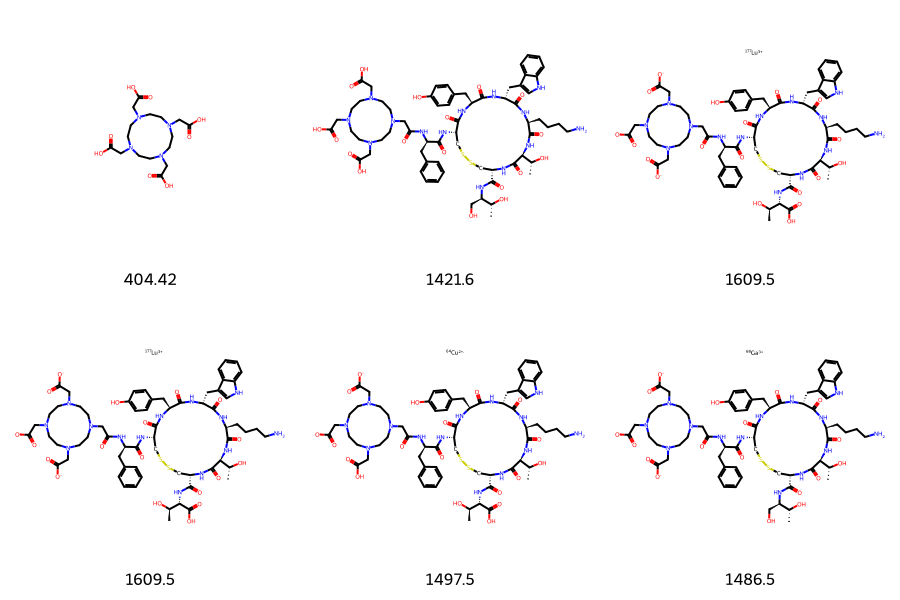

In [18]:
# Draw the first 10 valid molecules
img = Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in df['smiles'][:6]],
                           molsPerRow= 3,  # Adjust to show 3 molecules per row
                           subImgSize=(300, 300),# Size of each molecule's image
                           useSVG=True,# Use SVG for better image quality
                           legends=[str(x) for x in df.mw])  

# Show the image
img

In [19]:
df.head(3)

,smiles,mw,hbonddonor,rotbonds,charge,valid_smiles
0,C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O,404.42,4,8,0,True
1,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1421.60,17,26,0,True
2,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,18,0,True


In [20]:
# # If you want to add MW:

# from rdkit.Chem import Descriptors
# df['mw'] = df['smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))

In [21]:
#For generating molecular fingerprints 
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
PandasTools.AddMoleculeColumnToFrame(df,'smiles','mol')
df.head()


[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors


,smiles,mw,hbonddonor,rotbonds,charge,valid_smiles,mol
0,C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O,404.42,4,8,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b73e0>
1,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1421.60,17,26,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b70d0>
2,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,18,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7290>
3,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,23,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b75a0>
4,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1497.50,15,24,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7760>


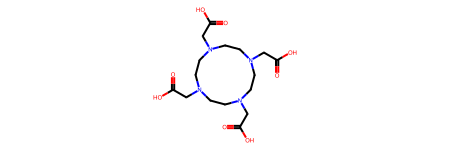

In [22]:
df.mol[0]

# # MACCS (Molecular ACCess System) Keys fingerprints

MACCS (Molecular ACCess System) Keys fingerprints are a fixed-length binary fingerprint representation of a molecule, commonly used in chemoinformatics for similarity searching and QSAR modeling.

In MACCS Keys fingerprints (166-bit), each bit represents the presence or absence of a specific chemical feature or substructure in a molecule.

* 1 (ON) → The molecule contains the corresponding structural feature.
* 0 (OFF) → The molecule does not contain that feature.

In [26]:
from rdkit.Chem import MACCSkeys
# Generate MACCS keys fingerprint
m_keys = MACCSkeys.GenMACCSKeys(df.mol[0])
m_keys

In [27]:
binary_fp = list(m_keys)

In [28]:
# Convert list to string and print
print("".join(map(str, binary_fp)))

00000000000000000000000000000000000000000000000000000000000000000000000000010001000001100001000100001100100000010000001011110000110110001111101000111000011101110100110


In [29]:
# Convert to numpy array (204 bits)
bit_vector = np.array(m_keys)
bit_vector

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [30]:
import pandas as pd
macc_df = pd.DataFrame(bit_vector).T
macc_df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0


In [31]:
len(bit_vector)


167

In [32]:
from collections import Counter
Counter(bit_vector)

Counter({0: 130, 1: 37})

In [33]:
bit_vector.shape

(167,)

In [34]:
# Print indices of bits that are "On"
print("Index of On bits:", tuple(m_keys.GetOnBits()))   

Index of On bits: (75, 79, 85, 86, 91, 95, 100, 101, 104, 111, 118, 120, 121, 122, 123, 128, 129, 131, 132, 136, 137, 138, 139, 140, 142, 146, 147, 148, 153, 154, 155, 157, 158, 159, 161, 164, 165)


In [35]:
# Print number of bits that are "On"
print("Number of On bits:", len(m_keys.GetOnBits()))

Number of On bits: 37


## Avalon fingerprints


* An Avalon fingerprint refers to a type of molecular fingerprint generated using the Avalon Toolkit, which is an alternative to the more commonly used Morgan (ECFP) or Daylight-like fingerprints.

* It is a binary molecular fingerprint used to encode molecular structure information.
* It is generated using AvalonToolkit, an external cheminformatics library that RDKit can interface with.
* It is useful for similarity searching, clustering, and machine learning applications in cheminformatics.

In [38]:
from rdkit.Avalon import pyAvalonTools
# Generate Avalon fingerprint with 512 bits
Av = pyAvalonTools.GetAvalonFP(df.mol[0], nBits=512)    

In [39]:
# Convert to NumPy array for visualization
print("Avalon Fingerprint as Array:", np.array(Av))

Avalon Fingerprint as Array: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [40]:
# Print index of 'On' bits
print("On bit positions:", list(Av.GetOnBits()))

On bit positions: [15, 23, 34, 50, 59, 67, 76, 80, 94, 111, 112, 113, 114, 116, 198, 208, 210, 213, 219, 222, 233, 258, 260, 262, 280, 281, 300, 303, 304, 311, 312, 318, 329, 330, 334, 342, 348, 354, 355, 374, 375, 407, 444, 451, 460, 493, 510]


In [41]:
# how many bits are On?
print("Number of On bits: ",len(Av.GetOnBits()))

Number of On bits:  47


## An Atom-Pairs Fingerprint

An Atom-Pairs Fingerprint is a molecular fingerprint that encodes topological relationships between atom pairs in a molecule. It captures:

Atom types (e.g., oxygen, carbon, nitrogen)
Bond distances between atom pairs
Chemical environments (e.g., hybridization, presence of rings)
These fingerprints are useful for molecular similarity searches and QSAR modeling.

In [44]:
# Calculate Atom-Pair fingerprints
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.AtomPairs import Pairs
AP_fp = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(df.mol[0], nBits=512)
print(np.array(AP_fp))

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[14:00:08] DEPRECATION WARNING: please use AtomPairGenerator


In [45]:
print("Index of On bits:", tuple(AP_fp.GetOnBits()))


Index of On bits: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18, 19, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 52, 53, 54, 60, 61, 62, 63, 64, 65, 66, 67, 112, 113, 114, 140, 141, 142, 143, 160, 161, 162, 163, 168, 169, 170, 171, 176, 177, 178, 180, 181, 182, 183, 208, 209, 210, 211, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 275, 276, 277, 278, 280, 281, 282, 284, 285, 286, 287, 288, 289, 290, 292, 293, 294, 295, 304, 305, 306, 307, 312, 313, 314, 315, 316, 317, 318, 336, 337, 338, 352, 353, 354, 380, 381, 384, 385, 386, 432, 433, 434, 435, 436, 437, 438, 440, 441, 442, 443, 456, 457)


In [46]:
print("Number of On bits:",len(AP_fp.GetOnBits()))

Number of On bits: 140


# # Topological-Torsions Fingerprint (TTFP)

Topological-Torsions Fingerprint (TTFP) in RDKit
The Topological-Torsions Fingerprint (TTFP) is a type of molecular fingerprint that captures four-atom torsions (also called bond torsions) in a molecule. It is useful in similarity searching and QSAR modeling.

How It Works
A torsion is a sequence of four connected atoms in a molecule.
The fingerprint encodes the topological (2D) connectivity of these four-atom fragments.
Unlike Morgan (ECFP) or Atom-Pair fingerprints, this method considers local 4-atom fragments.

In [49]:
TT_fp = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(df['mol'][0], nBits=512)
print(np.array(TT_fp))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

[14:00:08] DEPRECATION WARNING: please use TopologicalTorsionGenerator


## Morgan-Circular Fingerprints 

Morgan-Circular Fingerprints (often referred to simply as Circular Fingerprints) are a type of molecular fingerprint used in cheminformatics and computational chemistry to represent the structural features of molecules in a binary vector format. These fingerprints are widely used for similarity searching, machine learning, and molecular descriptor generation.

In [52]:

# Create a Morgan fingerprint generator with radius=2 and 2048 bits
fp_gen = AllChem.GetMorganGenerator(radius=2, fpSize=2048)
# Generate the fingerprint as a bit vector
fp = fp_gen.GetFingerprint(df.mol[0])
print(np.array(fp))

[0 0 0 ... 0 0 0]


In [53]:
# Ensure NumPy prints all elements
np.set_printoptions(threshold=np.inf)

# Print the full Morgan fingerprint as an array
print(np.array(fp))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [54]:
Counter(fp)

Counter({0: 2033, 1: 15})

In [55]:
len(fp)

2048

* Morgan Fingerprints: More detailed and larger (usually > 1024 bits), capturing atom neighborhoods and structural patterns.
* Avalon Fingerprints: Smaller and more compact (typically 1024 bits), capturing topological features of the molecule.

In [57]:
# Print the indices of On bits as a tuple
print("Index of On bits:", tuple(fp.GetOnBits()))

Index of On bits: (74, 80, 277, 307, 389, 650, 807, 926, 935, 1248, 1312, 1480, 1737, 1791, 1917)


In [58]:
# Print the number of On bits
print("Number of On bits:", len(fp.GetOnBits()))

Number of On bits: 15


In [59]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(df['mol'][0], radius=2, nBits = 2048, bitInfo=bi)

[14:00:08] DEPRECATION WARNING: please use MorganGenerator


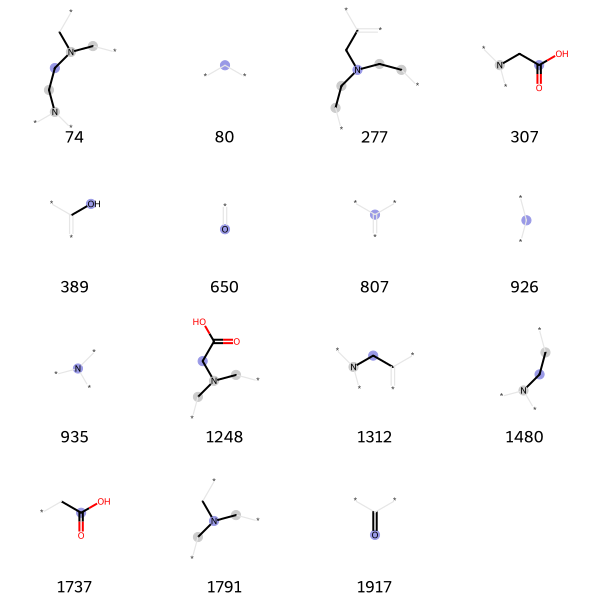

In [60]:
all_frag = [(df['mol'][0],x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(all_frag,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()])

In [61]:
len(all_frag)

15

 # # RDKit Fingerprints

RDKit Fingerprints are a way of representing chemical structures in a compact, fixed-length bit vector format, where each bit represents the presence or absence of certain structural features or substructures in the molecule.

In [64]:
# Initialize an empty dictionary to store bit information
rdkbi = {}
# Generate RDKit fingerprint (RDKFingerprint) with a maximum path length of 5 and 512 bits
Rdk = AllChem.RDKFingerprint(df.mol[0], maxPath=5, fpSize=512, bitInfo=rdkbi)

In [65]:
# Print the RDKit fingerprint as a numpy array
print(np.array(Rdk))

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [66]:
on_bits = Rdk.GetOnBits()
print("Index of On bits:", tuple(on_bits))

Index of On bits: (13, 14, 15, 21, 35, 40, 50, 51, 68, 76, 81, 96, 104, 112, 117, 124, 129, 142, 145, 151, 153, 159, 166, 171, 177, 186, 192, 202, 209, 221, 236, 240, 254, 284, 297, 311, 315, 319, 323, 328, 338, 365, 371, 372, 382, 384, 397, 412, 417, 420, 426, 430, 434, 440, 446, 460, 470, 471, 481, 511)


In [67]:
# Print how many bits are On
print("Number of On bits:", len(on_bits))

Number of On bits: 60


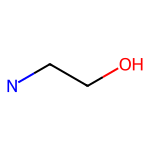

In [68]:
# Visualize the fragment corresponding to the 16th bit being ON
# This will visualize the substructure corresponding to the bit at index 16
Draw.DrawRDKitBit(df.mol[0],15, rdkbi)

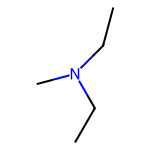

In [69]:
Draw.DrawRDKitBit(df.mol[0],40, rdkbi)

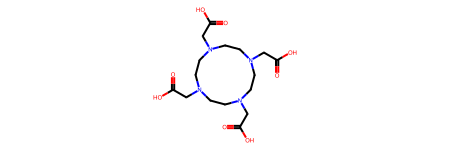

In [70]:
mol = df.mol[0]
mol

In [71]:
# Get the first 5 bit indices from the dictionary
first_five_bits = list(rdkbi.keys())[:5]
first_five_bits

[13, 14, 15, 21, 35]

In [72]:
# Create fragments for the first 5 bits
fragments = [(df.mol[0], bit, rdkbi) for bit in first_five_bits]

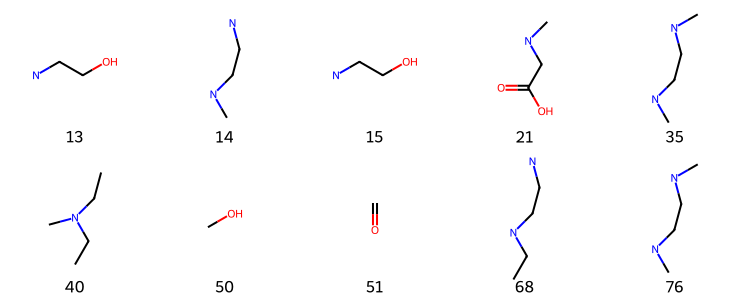

In [73]:
# Visualize more fragments 
fragments = [(df.mol[0], x, rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(fragments[:10],molsPerRow=5,legends=[str(x) for x in rdkbi][:10])

In [74]:
SDF = PandasTools.LoadSDF('DOTA.sdf',
                            smilesName='SMILES',
                            molColName='Molecule',
                            )
     

,PUBCHEM_COMPOUND_CID,PUBCHEM_COMPOUND_CANONICALIZED,PUBCHEM_CACTVS_COMPLEXITY,PUBCHEM_CACTVS_HBOND_ACCEPTOR,PUBCHEM_CACTVS_HBOND_DONOR,PUBCHEM_CACTVS_ROTATABLE_BOND,PUBCHEM_CACTVS_SUBSKEYS,PUBCHEM_IUPAC_OPENEYE_NAME,PUBCHEM_IUPAC_CAS_NAME,PUBCHEM_IUPAC_NAME_MARKUP,...,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BOND_DEF_STEREO_COUNT,PUBCHEM_BOND_UDEF_STEREO_COUNT,PUBCHEM_ISOTOPIC_ATOM_COUNT,PUBCHEM_COMPONENT_COUNT,PUBCHEM_CACTVS_TAUTO_COUNT,PUBCHEM_COORDINATE_TYPE,ID,SMILES,Molecule
0,121841,1,447,12,4,8,AAADceB7vAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,"2-[4,7,10-tris(carboxymethyl)-1,4,7,10-tetraza...","2-[4,7,10-tris(carboxymethyl)-1,4,7,10-tetraza...","2-[4,7,10-tris(carboxymethyl)-1,4,7,10-tetraza...",...,0,0,0,0,1,-1,1\n5\n255,121841,O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1,

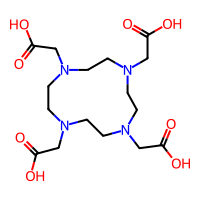

In [75]:
SDF

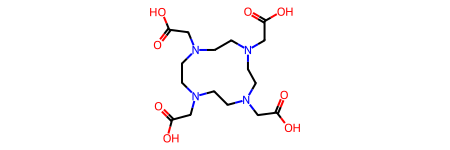

In [76]:
molecule = SDF['Molecule'][0]
molecule

In [77]:
smile = SDF['SMILES'][0]
smile

'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1'

[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors


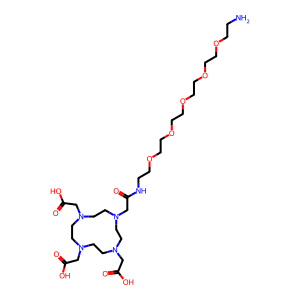

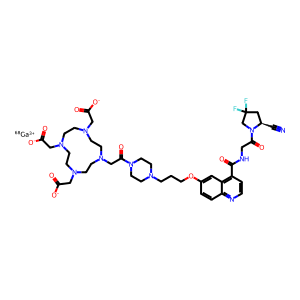

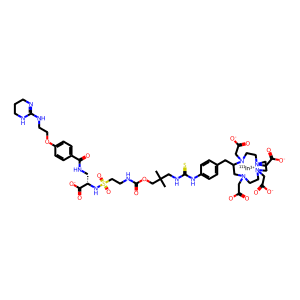

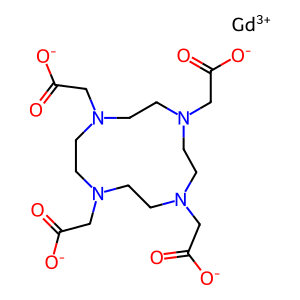

In [78]:
# Import necessary modules from RDKit
from rdkit import Chem
from rdkit.Chem import Draw

# Load the SDF file using SDMolSupplier
sdmol = Chem.SDMolSupplier('DOTA_compounds.sdf')

# Convert SDMolSupplier to a list before slicing
sdmol_list = list(sdmol)

# Display the first 5 molecules as images
for mol in sdmol_list[:4]:
    if mol is not None:  # Ensure the molecule is valid
        img = Draw.MolToImage(mol)
        display(img)


[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors
[14:00:08] WARNING: not removing hydrogen atom without neighbors


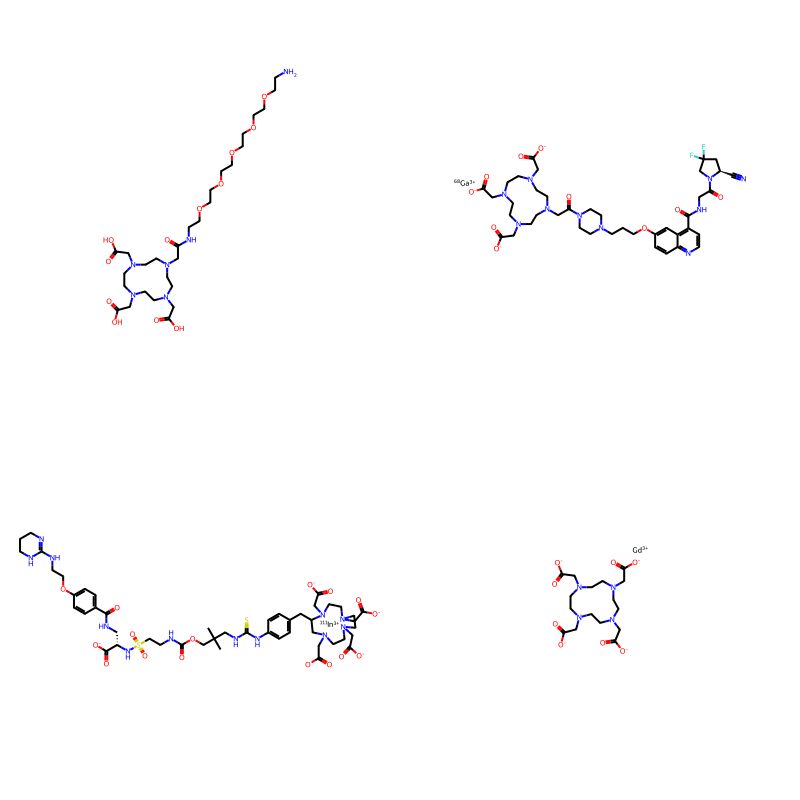

In [79]:
img=Draw.MolsToGridImage(list(sdmol)[:4],
                         molsPerRow=2,
                         subImgSize=(400,400),
                         )
img

In [80]:
df.head()

,smiles,mw,hbonddonor,rotbonds,charge,valid_smiles,mol
0,C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O,404.42,4,8,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b73e0>
1,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1421.60,17,26,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b70d0>
2,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,18,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7290>
3,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,23,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b75a0>
4,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1497.50,15,24,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7760>


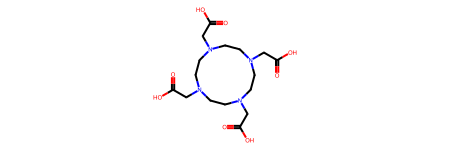

In [150]:
first_mol = df.mol[0]
first_mol

In [152]:
Chem.MolToSmiles(first_mol)

'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1'

In [158]:
sdmol = Chem.SDMolSupplier('DOTA_compounds.sdf')
DOTA_smiles = []
for mol in sdmol:
  smile = Chem.MolToSmiles(mol)
  DOTA_smiles.append(smile)

DOTA_smiles[:7]

[14:04:18] WARNING: not removing hydrogen atom without neighbors
[14:04:18] WARNING: not removing hydrogen atom without neighbors
[14:04:18] WARNING: not removing hydrogen atom without neighbors
[14:04:18] WARNING: not removing hydrogen atom without neighbors
[14:04:18] WARNING: not removing hydrogen atom without neighbors


['NCCOCCOCCOCCOCCOCCNC(=O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1',
 'N#C[C@@H]1CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2ccc(OCCCN3CCN(C(=O)CN4CCN(CC(=O)[O-])CCN(CC(=O)[O-])CCN(CC(=O)[O-])CC4)CC3)cc12.[68Ga+3]',
 'CC(C)(CNC(=S)Nc1ccc(CC2CN(CC(=O)[O-])CCN(CC(=O)[O-])CCN(CC(=O)[O-])CCN2CC(=O)[O-])cc1)COC(=O)NCCS(=O)(=O)N[C@@H](CNC(=O)c1ccc(OCCNC2=NCCCN2)cc1)C(=O)[O-].[111In+3]',
 'O=C([O-])CN1CCN(CC(=O)[O-])CCN(CC(=O)[O-])CCN(CC(=O)[O-])CC1.[Gd+3]',
 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)NCCN2C(=O)C=CC2=O)CCN(CC(=O)O)CC1',
 'O=C(O)CN1CCN(CC(=O)O)CCN(CC(=O)NCCCCC(NC(=O)C(Cc2ccc(O)cc2)NC(=O)CN2CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC2)C(=O)O)CCN(CC(=O)O)CC1',
 'CN(CC(=O)Nc1ccc(C[C@H]2CN(CC(=O)[O-])CCN(CC(=O)[O-])CCN(CC(=O)[O-])CCN2CC(=O)[O-])cc1)C(=O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21.[177Lu+3].[H+]']

# 2D Geometries

In [163]:
mol = Chem.MolFromSmiles('NCCOCCOCCOCCOCCOCCNC(=O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1')
mol.SetProp("_Name","mol-2d")
AllChem.Compute2DCoords(mol)

0

In [165]:
print(Chem.MolToMolBlock(mol))

mol-2d
     RDKit          2D

 46 46  0  0  0  0  0  0  0  0999 V2000
  -22.4999    0.3398    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  -21.1443    0.9820    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -19.9103    0.1292    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -18.5548    0.7714    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  -17.3208   -0.0814    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -15.9652    0.5608    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -14.7313   -0.2920    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  -13.3757    0.3502    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -12.1418   -0.5026    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  -10.7862    0.1396    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -9.5522   -0.7132    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -8.1967   -0.0710    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.9627   -0.9238    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6071   -0.281

In [169]:
mol = Chem.MolFromSmiles('NCCOCCOCCOCCOCCOCCNC(=O)CN1CCN(CC(=O)O)CCN(CC(=O)O)CCN(CC(=O)O)CC1')
mol.SetProp("_Name","mol-3d")
mol2 = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol2)

0

In [171]:
print(Chem.MolToMolBlock(mol2))

mol-3d
     RDKit          3D

100100  0  0  0  0  0  0  0  0999 V2000
   14.0704    2.7942   -0.8678 N   0  0  0  0  0  0  0  0  0  0  0  0
   14.4277    2.0887    0.3529 C   0  0  0  0  0  0  0  0  0  0  0  0
   14.6126    0.6149    0.0527 C   0  0  0  0  0  0  0  0  0  0  0  0
   13.4487    0.0869   -0.4682 O   0  0  0  0  0  0  0  0  0  0  0  0
   12.4011    0.1995    0.4061 C   0  0  0  0  0  0  0  0  0  0  0  0
   11.1659   -0.3613   -0.3429 C   0  0  0  0  0  0  0  0  0  0  0  0
   10.1147   -0.2225    0.5651 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.9432   -0.5647   -0.0896 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.9822   -1.9956   -0.5678 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7967   -2.2937   -1.2572 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.6658   -2.1352   -0.4786 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4096   -2.4155   -1.3378 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2668   -2.2799   -0.5879 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.1118   -1.075

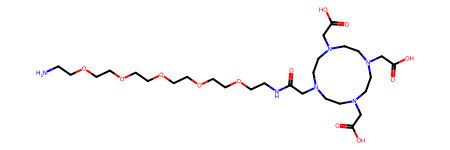

In [173]:
mol

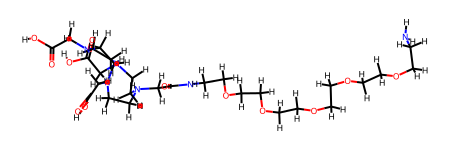

In [175]:
mol2

# Optimizing molecules

*AllChem.MMFFOptimizeMoleculeConfs* is a function in RDKit that performs energy minimization of multiple conformers of a molecule using the MMFF94 force field.

In [178]:
res = AllChem.MMFFOptimizeMoleculeConfs(mol2)
res

[(1, 351.929473878532)]

# # # Highlighting Molecule Fragments Based on SMARTS Patterns

In [215]:

from rdkit.Chem.Draw import rdMolDraw2D 
pattern = Chem.MolFromSmarts('C=O')
hit_ats = list(mol.GetSubstructMatch(pattern))
d = rdMolDraw2D.MolDraw2DSVG(2000, 2000) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)


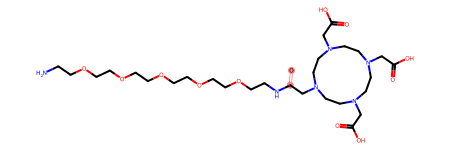

In [217]:
mol

In [219]:
df.head()

,smiles,mw,hbonddonor,rotbonds,charge,valid_smiles,mol
0,C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O,404.42,4,8,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b73e0>
1,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1421.60,17,26,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b70d0>
2,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,18,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7290>
3,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,23,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b75a0>
4,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1497.50,15,24,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7760>


In [251]:

for mol in df['mol']:
  hit_ats = list(mol.GetSubstructMatch(pattern))
  d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
  rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)
df.head()

,smiles,mw,hbonddonor,rotbonds,charge,valid_smiles,mol
0,C1CN(CCN(CCN(CCN1CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O,404.42,4,8,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b73e0>
1,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1421.60,17,26,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b70d0>
2,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,18,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7290>
3,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1609.50,14,23,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b75a0>
4,C[C@H]([C@H]1C(=O)N[C@@H](CSSC[C@@H](C(=O)N[C@...,1497.50,15,24,0,True,<rdkit.Chem.rdchem.Mol object at 0x1766b7760>


In [231]:
# Define a substructure pattern (example: carbonyl group)
pattern = Chem.MolFromSmarts('C=O')

# Perform the substructure search
match = mol.GetSubstructMatch(pattern)

# Print the atom indices that match the substructure
print("Substructure match indices:", match)



Substructure match indices: (2, 3)


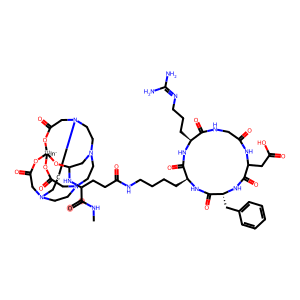

In [235]:
# Highlight the matched atoms in the molecule
img = Draw.MolToImage(mol, highlightAtoms=match)
img

In [243]:
matches = [mol for mol in df['mol'] if mol.HasSubstructMatch(pattern)]
len(matches)

301

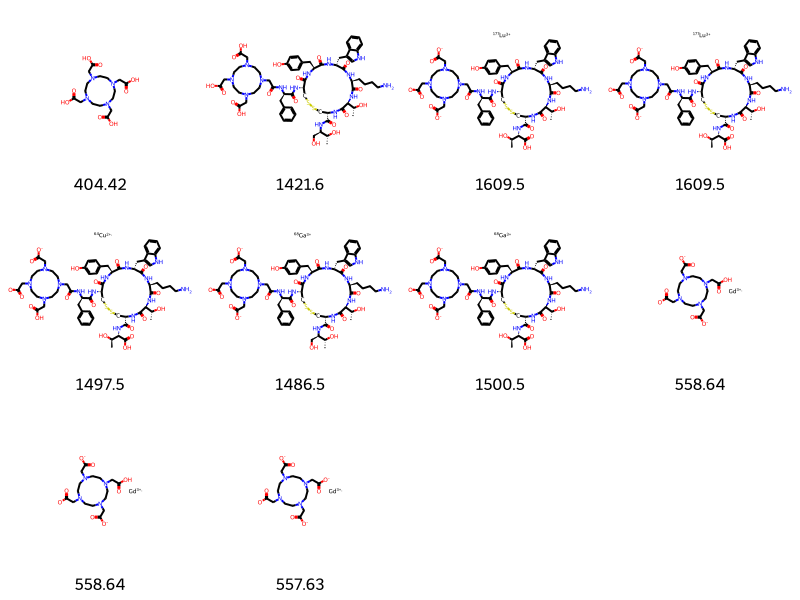

In [257]:
# Generate the grid of images for the matched molecules
img = Draw.MolsToGridImage(
    matches[:10],  # Only show the first 10 molecules
    molsPerRow=4,            # 4 molecules per row
    subImgSize=(200, 200),   # Each image size 200x200 pixels
    legends=[str(mw) for mw in df.loc[df['mol'].isin(matches), 'mw']]  # Legends with molecular weights
)

# Display the image
img